<a href="https://colab.research.google.com/github/nayun12/Tobigs_17/blob/main/Clustering_%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 17기 Clustering 정규세션 과제

## Clustering 해보기
### 1. Preprocssing / EDA
지금까지 배운 내용을 토대로 해당 데이터에 대해 자유롭게 전처리와 EDA를 진행해주세요.
### 2. Clustering 
수업 내용 및 실습 자료를 참고하여 클러스터링을 자유롭게 진행해주세요. 한 알고리즘에 대해 파라미터를 바꿔가며 비교를 해도 되고, 여러 알고리즘의 결과를 비교해도 됩니다.
### 3. Evaluation
결과에 대한 평가를 진행하고, 나름의 해석을 달아주세요.

**데이터:** [Mall Customer Segmentation Data| Kaggle](https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python)

---

## 0. 데이터 불러오기

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Tobigs/과제/Mall_Customers.csv", index_col = 0)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [ ]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


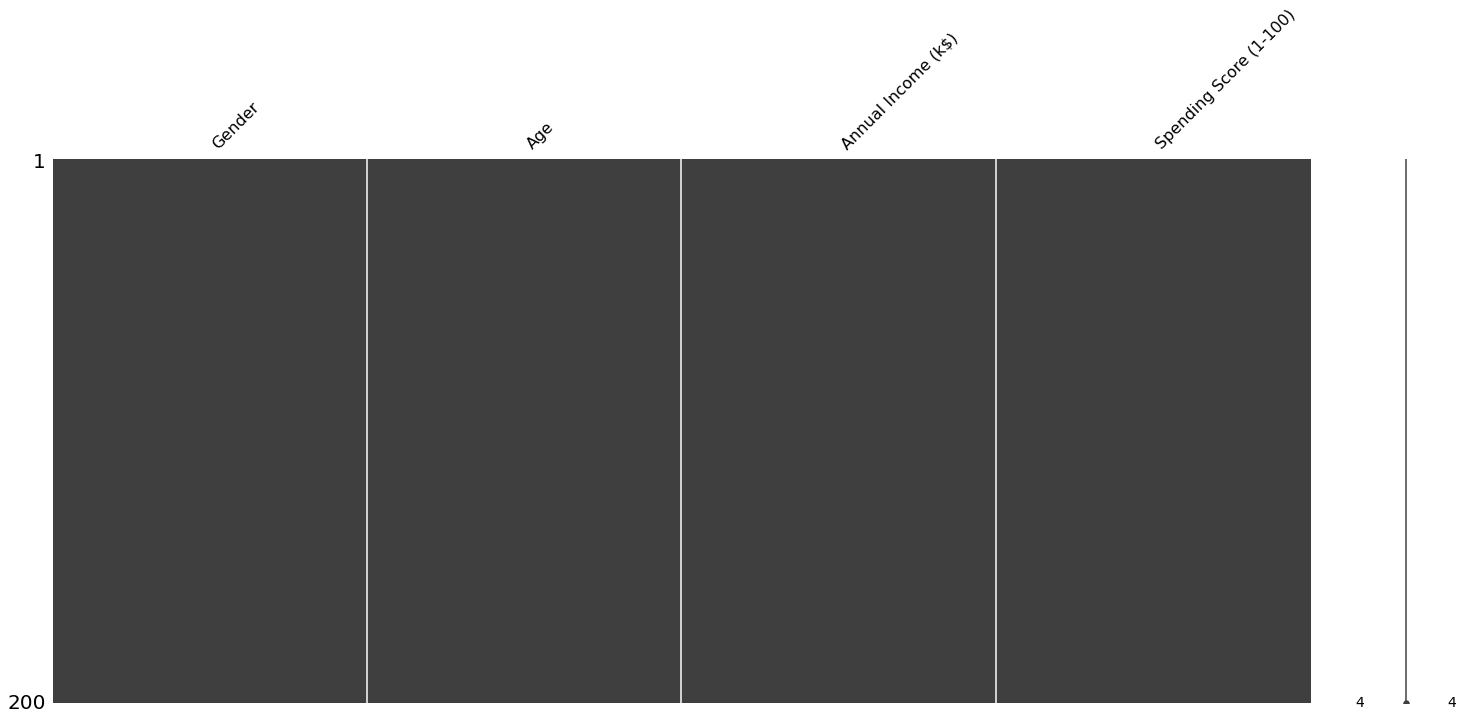

In [ ]:
import missingno as msno

msno.matrix(df)

Null값은 존재하지 않는다.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


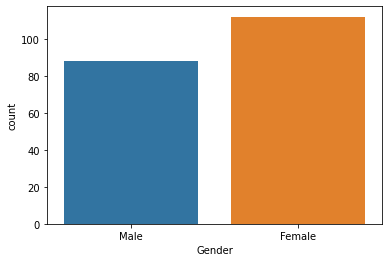

In [ ]:
import seaborn as sns
sns.countplot(df['Gender'])

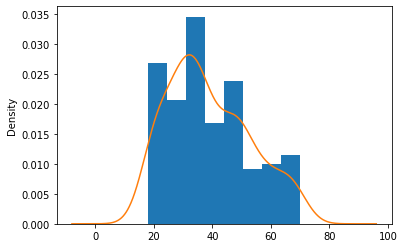

In [ ]:
import matplotlib.pyplot as plt
plt.hist(df['Age'], bins='fd', density=True)
df['Age'].plot.density()

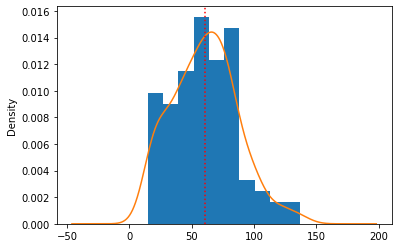

In [ ]:
plt.hist(df['Annual Income (k$)'], bins='fd', density=True)
df['Annual Income (k$)'].plot.density()
plt.axvline(df['Annual Income (k$)'].mean(), color='r', linestyle='dotted')

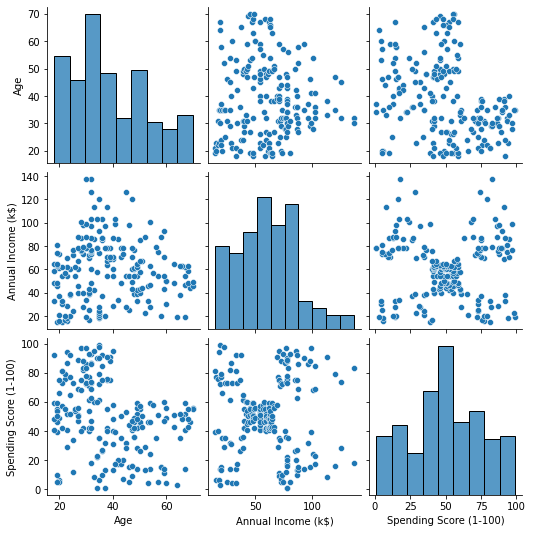

In [ ]:
sns.pairplot(df)

# KMeanse

In [ ]:
# Gender와 상관없이 군집화
df_G = df.drop("Gender", axis=1)

In [ ]:
# 데이터 스케일링 함수
from sklearn.preprocessing import MinMaxScaler
import numpy as np
def scaling(df):
    columns = df.columns.tolist()
    
    scaler = MinMaxScaler()

    for col in columns:
        df.loc[:, col] = scaler.fit_transform(np.array(df[col]).reshape(-1, 1))
    
    return df

In [ ]:
df_G = scaling(df_G)

In [ ]:
# 필요한 라이브러리, 함수 정의
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

def get_kmeans_silhouette(df):
    best_n = 1
    best_score = -1

    for n_cluster in range(2, 11):
        kmeans = KMeans(n_clusters = n_cluster)
        kmeans.fit(df)
        cluster = kmeans.predict(df)
        score = silhouette_score(df, cluster)

        print("클러스터의 수 : {}, 실루엣 점수 : {:.3f}".format(n_cluster, score))
        if score > best_score:
            best_n = n_cluster
            best_score = score

    print("\n가장 높은 실루엣 점수를 가진 클러스터 수 : {}, 실루엣 점수 : {:.3f}".format(best_n, best_score))


In [ ]:
df_G_g = df_G.iloc[:, :2]
get_kmeans_silhouette(df_G_g)

클러스터의 수 : 2, 실루엣 점수 : 0.413
클러스터의 수 : 3, 실루엣 점수 : 0.444
클러스터의 수 : 4, 실루엣 점수 : 0.385
클러스터의 수 : 5, 실루엣 점수 : 0.379
클러스터의 수 : 6, 실루엣 점수 : 0.389
클러스터의 수 : 7, 실루엣 점수 : 0.402
클러스터의 수 : 8, 실루엣 점수 : 0.411
클러스터의 수 : 9, 실루엣 점수 : 0.405
클러스터의 수 : 10, 실루엣 점수 : 0.406

가장 높은 실루엣 점수를 가진 클러스터 수 : 3, 실루엣 점수 : 0.444


In [ ]:
# K=3
kmeans = KMeans(n_clusters = 3)
kmeans.fit(df_G_g)
cluster = kmeans.predict(df_G_g)

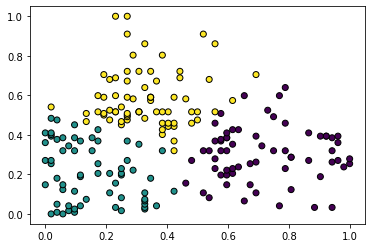

In [ ]:
plt.scatter(df_G_g['Age'], df_G_g['Annual Income (k$)'], linewidth = 1, c = cluster, edgecolor = 'black')
plt.show()

노란색군집 : 나이 어리고 수입 높음

초록색군집 : 나이 어리고 수입 낮음

검정색군집 : 나이 많고 수입 낮음

In [ ]:
df_G_gg = df_G.iloc[:, 1:]

In [ ]:
get_kmeans_silhouette(df_G_gg)

클러스터의 수 : 2, 실루엣 점수 : 0.333
클러스터의 수 : 3, 실루엣 점수 : 0.451
클러스터의 수 : 4, 실루엣 점수 : 0.496
클러스터의 수 : 5, 실루엣 점수 : 0.559
클러스터의 수 : 6, 실루엣 점수 : 0.537
클러스터의 수 : 7, 실루엣 점수 : 0.520
클러스터의 수 : 8, 실루엣 점수 : 0.430
클러스터의 수 : 9, 실루엣 점수 : 0.442
클러스터의 수 : 10, 실루엣 점수 : 0.447

가장 높은 실루엣 점수를 가진 클러스터 수 : 5, 실루엣 점수 : 0.559


In [ ]:
# K=5
kmeans = KMeans(n_clusters = 5)

In [ ]:
kmeans.fit(df_G_gg)
cluster = kmeans.predict(df_G_gg)


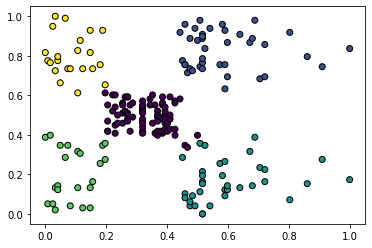

In [ ]:
plt.scatter(df_G_gg['Annual Income (k$)'], df_G_gg['Spending Score (1-100)'], linewidth = 1, c = cluster, edgecolor = 'black')
plt.show()

노란색군집 : 연봉낮고 지출높음

연두색군집 : 연봉낮고 지출낮음

검정색군집 : 연봉중간 지출중간

파란색군집 : 연봉높고 지출많음

청록색군집 : 연봉높고 지출적음